# Project: Food Safety
## Data Cleaning and Exploring Data Analysis

## Overview

In this project, I investigate restaurant food safety scores for restaurants in San Francisco. The scores and violation information have been [made available by the San Francisco Department of Public Health](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i). This project demonstrates the process of Data Cleaning and EDA, including...
* Reading simple csv files and using Pandas
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Exploring characteristics and distributions of individual variables

## Standard Imports

Unless stated otherwise, I tried to avoid using python for loops or list comprehensions. The majority of this project was done using built-in commands in Pandas and NumPy.  

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import zipfile
import os # Used to interact with the file system
'imports complete'

'imports complete'

## Obtaining the Data

## Part 1: Loading Food Safety Data

With the data, but no specific questions about it yet, I first focus on understanding the structure of the data. This involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

I first start by looking at the contents of `data.zip`. It's not a just single file but rather a compressed directory of multiple files. Instead of uncompressing it using a shell command such as `!unzip data.zip`, in this project, I do almost everything in Python for maximum portability.

### 1.1: Looking Inside and Extracting the Zip Files

I assign `my_zip` to a `zipfile.ZipFile` object representing `data.zip`, and assign `list_names` to a list of all the names of the contents in `data.zip`.

In [2]:
my_zip = zipfile.ZipFile("data.zip", "r")
list_names = my_zip.namelist()
list_names

['data/',
 'data/bus.csv',
 'data/ins.csv',
 'data/ins2vio.csv',
 'data/legend.csv',
 'data/sf_zipcodes.json',
 'data/vio.csv']

I now display the files' names and their sizes. It is formatted such that each file and its size is on a new line.

In [3]:
my_zip.printdir()

File Name                                             Modified             Size
data/                                          2022-10-31 07:16:24            0
data/bus.csv                                   2021-12-07 08:24:58       665365
data/ins.csv                                   2021-12-07 08:24:58      1860919
data/ins2vio.csv                               2021-12-07 08:24:58      1032799
data/legend.csv                                2021-12-07 08:24:58          120
data/sf_zipcodes.json                          2021-12-07 08:24:58          474
data/vio.csv                                   2021-12-07 08:24:58         4213


Unzip the csv files into a subdirectory called `data`.

In [4]:
my_zip.extractall()

### 1.2: Reading in the Files

I load `bus.csv`, `ins2vio.csv`, `ins.csv`, and `vio.csv` into pandas dataframes with the following names: `bus`, `ins2vio`, `ins`, and `vio` respectively.

In [5]:
bus = pd.read_csv("data/bus.csv")
ins2vio = pd.read_csv("data/ins2vio.csv")
ins = pd.read_csv("data/ins.csv")
vio = pd.read_csv("data/vio.csv")

I now check the top few lines of the `bus`, `ins`, and `vio` dataframes.

In [6]:
display(bus.head(), ins.head(), vio.head())

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


,description,risk_category,vid
0,Consumer advisory not provided for raw or unde...,Moderate Risk,103128
1,Contaminated or adulterated food,High Risk,103108
2,Discharge from employee nose mouth or eye,Moderate Risk,103117
3,Employee eating or smoking,Moderate Risk,103118
4,Food in poor condition,Moderate Risk,103123


I also use the `DataFrame.describe` method to compute summaries of numeric columns of all four dataframes.

In [7]:
display(bus.describe, ins2vio.describe, ins.describe, vio.describe)

<bound method NDFrame.describe of       business id column                         name                 address  \
0                   1000        HEUNG YUEN RESTAURANT            3279 22nd St   
1                 100010        ILLY CAFFE SF_PIER 39        PIER 39  K-106-B   
2                 100017  AMICI'S EAST COAST PIZZERIA             475 06th St   
3                 100026               LOCAL CATERING        1566 CARROLL AVE   
4                 100030             OUI OUI! MACARON  2200 JERROLD AVE STE C   
...                  ...                          ...                     ...   
6248               99948            SUSIECAKES BAKERY      3509 CALIFORNIA ST   
6249               99988                HINODEYA SOMA     303 02nd ST STE 102   
6250               99991                      TON TON            422 GEARY ST   
6251               99992   URBAN EXPRESS KITCHENS LLC             475 06th ST   
6252               99993            THE BRIXTON SOUTH             701 02nd 

<bound method NDFrame.describe of                    iid     vid
0       97975_20190725  103124
1       85986_20161011  103114
2       95754_20190327  103124
3       77005_20170429  103120
4        4794_20181030  103138
...                ...     ...
40205   76958_20180919  103119
40206   80305_20190411  103149
40207   80233_20190417  103133
40208  100216_20190321  103119
40209   79430_20190418  103109

[40210 rows x 2 columns]>

<bound method NDFrame.describe of                    iid                    date  score                   type
0      100010_20190329  03/29/2019 12:00:00 AM     -1       New Construction
1      100010_20190403  04/03/2019 12:00:00 AM    100  Routine - Unscheduled
2      100017_20190417  04/17/2019 12:00:00 AM     -1          New Ownership
3      100017_20190816  08/16/2019 12:00:00 AM     91  Routine - Unscheduled
4      100017_20190826  08/26/2019 12:00:00 AM     -1  Reinspection/Followup
...                ...                     ...    ...                    ...
26658     999_20180924  09/24/2018 12:00:00 AM     -1    Routine - Scheduled
26659     999_20181102  11/02/2018 12:00:00 AM     -1  Reinspection/Followup
26660     999_20190909  09/09/2019 12:00:00 AM     80  Routine - Unscheduled
26661      99_20171207  12/07/2017 12:00:00 AM     82  Routine - Unscheduled
26662      99_20180808  08/08/2018 12:00:00 AM     84  Routine - Unscheduled

[26663 rows x 4 columns]>

<bound method NDFrame.describe of                                           description  risk_category     vid
0   Consumer advisory not provided for raw or unde...  Moderate Risk  103128
1                    Contaminated or adulterated food      High Risk  103108
2           Discharge from employee nose mouth or eye  Moderate Risk  103117
3                          Employee eating or smoking  Moderate Risk  103118
4                              Food in poor condition  Moderate Risk  103123
..                                                ...            ...     ...
60  Unclean unmaintained or improperly constructed...       Low Risk  103152
61                          Unpermitted food facility       Low Risk  103158
62         Unsanitary employee garments hair or nails       Low Risk  103136
63  Wiping cloths not clean or properly stored or ...       Low Risk  103149
64                              Worker safety hazards       Low Risk  103159

[65 rows x 3 columns]>

### 1.3: Identifying Potential Issues with the Data

The `latitude` and `longitude` columns of the `bus` dataframe both appear to be faulty data, as every listed value appears to be `-9999.000`. This data was either corrupted or not collected properly to begin with. Similarly, the `date` column of the `ins` dataframe, which lists both a date *and* a time, has either incorrect or meaningless time values, as they are all listed as `12:00:00 AM`. Either the data was meant to be collected and was then corrupted *or* the data was never meant to be included and therefore needs to be cleaned out of the `date` column.

To ensure that all files and resulting dataframes are clean and without error, I explore each file, including determining its granularity and primary keys and exploring many of the variables individually.

# Part 2: Examining the Business Data File

The `bus.csv` file should contain information about restaurants.

In [8]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


### 2.1: Rename a Column

Rename the `business id column`, which corresponds to a unique business id, to `bid`.

In [9]:
bus = bus.rename(columns = {"business id column" : "bid"})
bus

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675
...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14150452253
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.000000,-9999.000000,-9999
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.000000,-9999.000000,14155531280
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14150368085


### 2.2: Determining Uniqueness of Each Entry

Determine whether or not the `bid` is unique for each record (i.e. each row of data)? The code in the cell below computes this.

In [10]:
if sum(bus["bid"].value_counts() != 1) == 0:
    is_bid_unique = True
else:
    is_bid_unique = False

is_bid_unique

True

The business ID `bid` **is** unique for each record/row of data.

### 2.3: Creating Series to Evaluate Value Counts

In the two cells below, I create two **series**:

1. Where the index is the `name` of the business and the value is the number of records with that `name`
2. Where the index is the `address` of the business and the value is the number of records with that `address`

Both series are in descending order, by count.

In [11]:
name_counts = bus["name"].value_counts()
name_counts.head(20)

name
Peet's Coffee & Tea                                       20
Starbucks Coffee                                          13
McDonald's                                                10
Jamba Juice                                               10
STARBUCKS                                                  9
Proper Food                                                9
Mixt Greens/Mixt                                           8
Specialty's Cafe & Bakery                                  8
Philz Coffee                                               7
The Organic Coup                                           7
Starbucks                                                  7
Whole Foods Market                                         7
Blue Bottle Coffee                                         7
Bon Appetit @ Twitter                                      6
Lee's Deli                                                 6
BlueStar Refreshment Services @ Uber Technologies, Inc     6
Annie's Hot Dogs & 

In [12]:
address_counts = bus["address"].value_counts()
address_counts.head(10)

address
Off The Grid              39
428 11th St               34
2948 Folsom St            17
3251 20th Ave             17
Pier 41                   16
103 Horne Ave             14
24 Willie Mays Plaza      13
Off the Grid              11
1 United Nations Plaza    10
2948 Folsom St.           10
Name: count, dtype: int64

### 2.4: Determining Granularity

Based on the above, we know that...

1. Each record represents one location of a restaurant.  
1. The minimal primary key is `bid`, the business ID.

## Part 3: Cleaning the Business Data Postal Codes

The business data contains postal code information that can be used to aggregate the ratings over regions of the city of San Francisco. Before continuing, I first examine and clean the postal code (ZIP code) field.

<img src="https://www.usmapguide.com/wp-content/uploads/2019/03/printable-san-francisco-zip-code-map.jpg" alt="ZIP Code Map" style="width: 600px">

### 3.1: Determining Count by ZIP Code

In the cell below, I create a series where the index is the postal code and the value is the number of records with that postal code, in descending order of count.

In [13]:
zip_counts = bus["postal_code"].value_counts()
print(zip_counts.to_string())

postal_code
94103         562
94110         555
94102         456
94107         408
94133         398
94109         382
94111         259
94122         255
94105         249
94118         231
94115         230
94108         229
94124         218
94114         200
-9999         194
94112         192
94117         189
94123         177
94121         157
94104         142
94132         132
94116          97
94158          90
94134          82
94127          67
94131          49
94130           8
94143           5
94301           2
94188           2
94101           2
CA              2
94013           2
941102019       1
941             1
95112           1
94105-2907      1
94102-5917      1
94124-1917      1
94621           1
95122           1
95132           1
95109           1
95133           1
95117           1
94901           1
94105-1420      1
94544           1
64110           1
94122-1909      1
00000           1
94080           1
Ca              1
94602           1
94129           

### 3.2: Evaluating the `postal_code` Column

We observe that the ZIP code column `postal_code` is a Qualitative Nominal variable, but that the `bus` dataframe's `postal_code` column contains string values, not just integer values. These values are invalid, likely due to errors in data entry, and will prove to be problematic when attempting to conduct further analysis using the ZIP code values.

### 3.3: Better Understand Errors in `postal_code` Values

To get a better understanding of the potential errors in the zip codes, I import a list of valid San Francisco ZIP codes by using `pd.read_json` to load the file `data/sf_zipcodes.json` and extract a **series** of type `str` containing the valid ZIP codes.

In [14]:
valid_zips = pd.read_json("data/sf_zipcodes.json", dtype = {"zip_codes" : "str"})["zip_codes"]
valid_zips.head()

0    94102
1    94103
2    94104
3    94105
4    94107
Name: zip_codes, dtype: object

I then construct a `DataFrame` containing only the businesses which DO NOT have valid ZIP codes.

In [15]:
invalid_zip_bus = bus[~bus["postal_code"].isin(valid_zips)]
invalid_zip_bus.head(20)

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
68,100417,"COMPASS ONE, LLC",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.000000,-9999.000000,14154324000
96,100660,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.000000,-9999.000000,14155868318
109,100781,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.000000,-9999.000000,14155614215
144,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,-9999.000000,-9999.000000,-9999
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
177,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.000000,-9999.000000,14150429222
276,102014,"DROPBOX (Section 3, Floor 7)",1800 Owens St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
295,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
298,10227,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.752581,-122.416482,-9999


### 3.4: Handling a Placeholder Value

Many of the businesses in the previous section had a common invalid postal code, likely used to encode a missing postal code. I examine them further.

In the following cell, I construct a series that counts the number of businesses at each `address` that have this single, likely missing, postal code value, ordered in descending order by count.

In [16]:
missing_zip_address_count = invalid_zip_bus[invalid_zip_bus["postal_code"] == "-9999"]["address"].value_counts()
missing_zip_address_count.head()

address
Off The Grid                  39
Off the Grid                  10
OTG                            4
Approved Locations             3
Approved Private Locations     3
Name: count, dtype: int64

### 3.5: Determining Potential for Business Exclusion

It seems, based off the addresses in the previous section, that specific restaurants would be disproportionately impacted by simply ignoring their ZIP code.

More specifically, it seems as though restaurants with an address of something to the effect of `Off The Grid` or `Approved (Private) Locations` are likely food truck-type establishments. Ignoring or omitting these restaurants from any study would be problematic for extrapolating that study's results to *all* restaurants in San Francisco. In other words, it becomes important to recognize that any study that omits these types of restaurants cannot then be extrapolated to these types of restaurants.

### 3.6: Handling Other Errors in `postal_code` Values

The `invalid_zip_bus` dataframe computed above contains businesses that don't have the special, missing ZIP code placeholder value. Some of these invalid ZIP codes are just the full nine digit code, rather than the first five digits. To account for this, I create a new column named `postal5`, in the original `bus` dataframe, which contains only the first five digits of the `postal_code` column. Then, for any of the `postal5` ZIP code entries that are not a valid San Francisco ZIP Code (according to the `valid_zips` set), I set the entry to `None`.  

In [17]:
bus['postal5'] = None
bus["postal5"] = bus["postal_code"].str.slice(stop = 5)
bus.loc[~bus["postal5"].isin(valid_zips), "postal5"] = None

# Checking the corrected postal5 column
bus.loc[invalid_zip_bus.index, ['bid', 'name', 'postal_code', 'postal5']]

,bid,name,postal_code,postal5
22,100126,Lamas Peruvian Food Truck,-9999,None
68,100417,"COMPASS ONE, LLC",94105-1420,94105
96,100660,TEAPENTER,94122-1909,94122
109,100781,LE CAFE DU SOLEIL,94117-3504,94117
144,101084,Deli North 200,94518,None
...,...,...,...,...
6173,99369,HOTEL BIRON,94102-5917,94102
6174,99376,Mashallah Halal Food truck Ind,-9999,None
6199,99536,FAITH SANDWICH #2,94105-2907,94105
6204,99681,Twister,95112,None


## Part 4: Investigate the Inspection Data

I now turn to the inspection `DataFrame`. Earlier, I found that `ins` has 4 columns named `iid`, `score`, `date`, and `type`. In this part, I will determine the granularity of `ins` and investigate the information provided for the inspections.

In [18]:
ins.head(5)

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


### 4.1: Determining Uniqueness of Each Entry

The column `iid` corresponds to an inspection ID. To determine whether or not it is a primary key, I check to see if each row/record in the `DataFrame` has a unique `iid`.

In [19]:
is_ins_iid_a_primary_key = len(ins["iid"]) == len(ins["iid"].value_counts())
is_ins_iid_a_primary_key

True

### 4.2: Split the `iid` Inspection ID Field

The column `iid` appears to be the composition of two values, and the first number looks like a business ID. To solve for this, I first create a new column called `bid` in the `ins` dataframe, containing just the business ID, and convert the data type of this column to `int`.

In [20]:
ins["bid"] = ins["iid"].str.split(pat = "_", expand = True)[0].astype(int)
ins

,iid,date,score,type,bid
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017
...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99


Some of these business IDs appear invalid, so I compute how many values in this new column *are* invalid business IDs (i.e. do not appear in the `bus['bid']` column).

In [21]:
invalid_bid_count = len(ins[~ins["bid"].isin(bus["bid"])])
invalid_bid_count

0

This suggests `ins['bid']` is a foreign key reference to `bus['bid']`.

### 4.3: Fixing `ins['date']` Data Type

The following cells note that each `ins['date']` entry is coded as a string and create a new column `ins['timestamp']` that features those dates as `pd.Timestamp` objects. This will allow for more data manipulation.

In [22]:
ins_date_type = type(ins["date"][0])
ins_date_type

str

In [23]:
ins["timestamp"] = pd.to_datetime(ins["date"])
ins

/var/folders/vq/5rjtcfpj68d8vc2d_y5p75680000gn/T/ipykernel_35350/3043758322.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ins["timestamp"] = pd.to_datetime(ins["date"])


,iid,date,score,type,bid,timestamp
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26
...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07


This allows for sorting through dates chronologically. I test this by checking the earliest and latest dates in our inspection data.

In [24]:
earliest_date = min(ins["timestamp"])
latest_date = max(ins["timestamp"])

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2016-10-04 00:00:00
Latest Date: 2019-11-28 00:00:00


I also create an additional `ins['year']` column, containing just the year of the inspection, to observe inspections by year.

In [25]:
ins["year"] = ins["timestamp"].dt.year
ins

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019
...,...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24,2018
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02,2018
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017


### 4.4: Examining Types of Inspection by Year

I construct a pivot table to observe the frequency of different types of inspections, by year.

In [26]:
ins_pivot = ins.pivot_table(index = "type", columns = "year", aggfunc = "size", fill_value = 0)
ins_pivot["Total"] = ins_pivot.sum(axis = 1)
ins_pivot_sorted = ins_pivot.sort_values("Total", ascending = False)
ins_pivot_sorted

year,2016,2017,2018,2019,Total
type,,,,,
Routine - Unscheduled,966,4057,4373,4681,14077
Reinspection/Followup,445,1767,1935,2292,6439
New Ownership,99,506,528,459,1592
Complaint,91,418,512,437,1458
New Construction,102,485,218,189,994
Non-inspection site visit,51,276,253,231,811
New Ownership - Followup,0,45,219,235,499
Structural Inspection,1,153,50,190,394
Complaint Reinspection/Followup,19,68,70,70,227


This pivot table allows for observations such as "the year 2017 had many more inspections in newly-constructed buildings than any other year in the 2016-19 timeframe."

### 4.5: Cleaning Inspection Scores

I now examine the inspection scores `ins['score']`.

In [27]:
ins['score'].value_counts().head()

score
-1      12632
 100     1993
 96      1681
 92      1260
 94      1250
Name: count, dtype: int64

There are a large number of inspections with the `'score'` of `-1`, a placeholder for missing values. To determine which types of inspections have real scores and which have a `-1` placeholder score, I construct a pivot table -- similar to the one in the previous section.

In [28]:
ins_missing_score_pivot_TEMP = ins
ins_missing_score_pivot_TEMP["Missing Score"] = ins_missing_score_pivot_TEMP["score"] == -1
ins_missing_score_pivot = ins_missing_score_pivot_TEMP.pivot_table(index = "type", columns = "Missing Score", aggfunc = "size", fill_value = 0)
ins_missing_score_pivot["Total"] = ins_missing_score_pivot.sum(axis = 1)
ins_missing_score_pivot = ins_missing_score_pivot.sort_values("Total", ascending = False)
ins_missing_score_pivot

Missing Score,False,True,Total
type,,,
Routine - Unscheduled,14031,46,14077
Reinspection/Followup,0,6439,6439
New Ownership,0,1592,1592
Complaint,0,1458,1458
New Construction,0,994,994
Non-inspection site visit,0,811,811
New Ownership - Followup,0,499,499
Structural Inspection,0,394,394
Complaint Reinspection/Followup,0,227,227


This pivot table shows that the only inspections with true scores are `Routine - Unscheduled` inspections.

In [29]:
# During the previous question, while creating `ins_missing_score_pivot,` the `Missing Score` column I created was
# added to the `ins` table for some reason. This cell drops that column from `ins,` restoring `ins` back to what
# it was prior to creating the `ins_missing_score_pivot` pivot table.

ins = ins.drop("Missing Score", axis = 1)
ins

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019
...,...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24,2018
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02,2018
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017


### 4.6: Connecting the Data

Before proceeding further, I first filter out missing scores from `ins` so that negative scores don't influence results.

In [30]:
ins = ins[ins["score"] > 0]
ins

,iid,date,score,type,bid,timestamp,year
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
15,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019
20,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019
21,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019
...,...,...,...,...,...,...,...
26654,999_20170714,07/14/2017 12:00:00 AM,77,Routine - Unscheduled,999,2017-07-14,2017
26656,999_20180123,01/23/2018 12:00:00 AM,80,Routine - Unscheduled,999,2018-01-23,2018
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017


I now create a new dataframe `ins_named`. It is exactly the same as `ins`, except has the name and address of every business, as determined by the `bus` dataframe. If a business ID `bid` in `ins` does not exist in `bus`, the name and address should be given as `NaN`.

In [31]:
ins_named = ins.merge(bus, how = "left", left_on = "bid", right_on = "bid")
ins_named = ins_named.iloc[:,0:9]
ins_named.head()

,iid,date,score,type,bid,timestamp,year,name,address
0,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
1,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,AMICI'S EAST COAST PIZZERIA,475 06th St
2,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,UNCLE LEE CAFE,3608 BALBOA ST
3,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,Twirl and Dip,335 Martin Luther King Jr. Dr
4,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,Twirl and Dip,335 Martin Luther King Jr. Dr


### 4.7: Looking at the Worst-Rated Restaurants

I now look at the 20 businesses with the lowest median score. The results are ordered by the median score, followed by business ID to break ties.

In [32]:
twenty_lowest_scoring = ins_named.groupby("name", as_index = False).median("score").sort_values(["score", "bid"]).head(20).drop("year", axis = 1)
twenty_lowest_scoring = twenty_lowest_scoring.rename({"score" : "median score"}, axis = 1)

twenty_lowest_scoring

,name,median score,bid
1014,Chaat Corner,54.0,84590.0
4589,Taqueria Lolita,57.0,90622.0
4989,VBowls LLC,58.0,94351.0
3169,New Jumbo Seafood Restaurant,60.5,69282.0
3995,SUNFLOWER RESTAURANT,63.5,1154.0
1350,Duc Loi Supermarket,64.0,39776.0
2977,Minna SF Group LLC,64.0,69397.0
1831,Golden Wok,64.0,78328.0
1046,Chez Beesen,64.0,93150.0
4195,Smoky Man,64.0,93502.0


## Part 5: Explore with Visualizations

In this part, I explore some of the basic inspection score values visually.

### 5.1: Visualizing Inspection Scores by Histogram

Histograms provide a view of the distribution of inspection scores. Inspection scores are coded as integer values, whose discreteness allows for a histogram visualization.

Text(0, 0.5, 'Count')

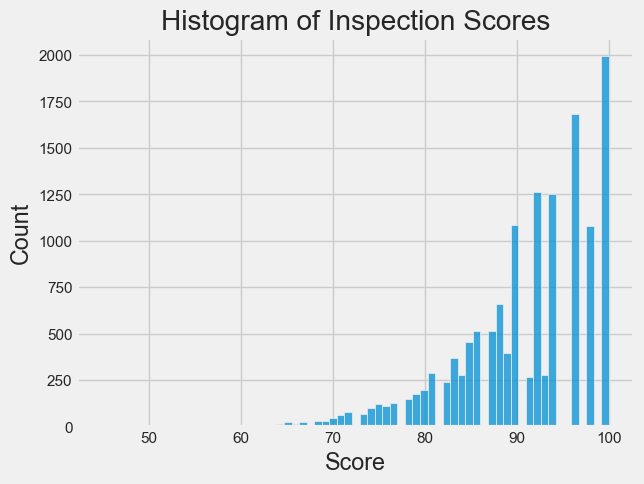

In [33]:
sns.histplot(data = ins, x = "score")
plt.title("Histogram of Inspection Scores")
plt.xlabel("Score")
plt.ylabel("Count")

### 5.2: Describing the Inspection Score Histogram

The distribution plotted above is left-skewed, meaning it is also not symmetric. It has multiple gaps in data along the x-axis, presumably because there are no inspections with those specific scores -- particularly in the range between 90 and 100. There appears to be two modes: a local maximum in the low-90s and the global maximum at 100. There do not appear to be any anomalous values or outliers. Beyond the multiple gaps in data, there does not seem to be anything unusual about the distribution. The vast majority of the scores are high, with very few below 80 and none below 60.

### 5.3: Change in Inspection Score Over Time

I now see which restaurant had the most extreme improvement in its inspection scores. I define the "swing" of a restaurant as the difference between its highest-ever and lowest-ever ratings. I only considered restaurants with at least three ratings (three scores). Additionally, the "swing" is of a specific business. While there are some restaurants with multiple locations, each location has its own "swing."

The final variable, `max_swing`, represents the name of the restaurant that had the greatest "swing."

In [34]:
copy_df = ins_named.copy(deep = True)
copy_df["count_restaurant"] = copy_df.groupby("name")["name"].transform("count")
copy_df = copy_df[copy_df["count_restaurant"] >= 3]
copy_df["count_location"] = copy_df.groupby(["name", "address"])["name"].transform("count")
copy_df = copy_df[copy_df["count_location"] >= 3]
#copy_df[copy_df["name"] == "Whole Foods Market"]

copy_df["swing"] = copy_df.groupby(["name", "address"])["score"].transform(lambda x: x.max() - x.min())
#copy_df[copy_df["name"] == "Whole Foods Market"]
copy_df = copy_df.sort_values("swing", ascending = False)
#copy_df

max_swing = copy_df["name"].iloc[0]
max_swing

'Lollipot'

### 5.4: Relationship Between Inspections in a Single Year

I now look at the relationship between the first and second scores for the businesses with two inspections in a year, to determine whether they typically improve or not. For simplicity, I only focus on 2018 here -- using the `ins2018` dataframe created below -- but this same process can be conducted for any year for which there is data.

First, I make a dataframe called `scores_pairs_by_business`, indexed by `business_id` (containing only businesses with exactly two inspections in 2018). This dataframe contains the field `score_pair` consisting of the score pairs ordered chronologically [first_score, second_score].

I then display these scores on a scatterplot. I also include on the plot a reference line with a slope of one.

In [35]:
# I create `ins2018` here.
ins2018 = ins[ins['year'] == 2018]
ins2018

,iid,date,score,type,bid,timestamp,year
62,1000_20180523,05/23/2018 12:00:00 AM,76,Routine - Unscheduled,1000,2018-05-23,2018
145,1002_20180509,05/09/2018 12:00:00 AM,90,Routine - Unscheduled,1002,2018-05-09,2018
148,10030_20180226,02/26/2018 12:00:00 AM,100,Routine - Unscheduled,10030,2018-02-26,2018
149,10030_20181016,10/16/2018 12:00:00 AM,100,Routine - Unscheduled,10030,2018-10-16,2018
180,1003_20180314,03/14/2018 12:00:00 AM,92,Routine - Unscheduled,1003,2018-03-14,2018
...,...,...,...,...,...,...,...
26265,98974_20181219,12/19/2018 12:00:00 AM,80,Routine - Unscheduled,98974,2018-12-19,2018
26270,98985_20181027,10/27/2018 12:00:00 AM,90,Routine - Unscheduled,98985,2018-10-27,2018
26477,9948_20180504,05/04/2018 12:00:00 AM,96,Routine - Unscheduled,9948,2018-05-04,2018
26656,999_20180123,01/23/2018 12:00:00 AM,80,Routine - Unscheduled,999,2018-01-23,2018


In [36]:
# I create `scores_pairs_by_business` here.
scores_pairs_by_business = ins2018.copy(deep = True)
scores_pairs_by_business["count_bids"] = scores_pairs_by_business.groupby("bid")["bid"].transform("count")
scores_pairs_by_business = scores_pairs_by_business[scores_pairs_by_business["count_bids"] == 2]
scores_pairs_by_business = scores_pairs_by_business.groupby("bid").agg(list).reset_index()
scores_pairs_by_business = scores_pairs_by_business.drop(["iid", "date", "type", "timestamp", "year", "count_bids"], axis = 1)
scores_pairs_by_business = scores_pairs_by_business.rename({"score":"score_pair"}, axis = 1)
scores_pairs_by_business = scores_pairs_by_business[["score_pair", "bid"]]
scores_pairs_by_business

,score_pair,bid
0,"[94, 87]",48
1,"[98, 98]",66
2,"[81, 90]",146
3,"[90, 96]",184
4,"[83, 84]",273
...,...,...
530,"[100, 100]",95621
531,"[75, 75]",95628
532,"[100, 96]",95674
533,"[91, 87]",95761


Text(0, 0.5, 'Second Inspection Score')

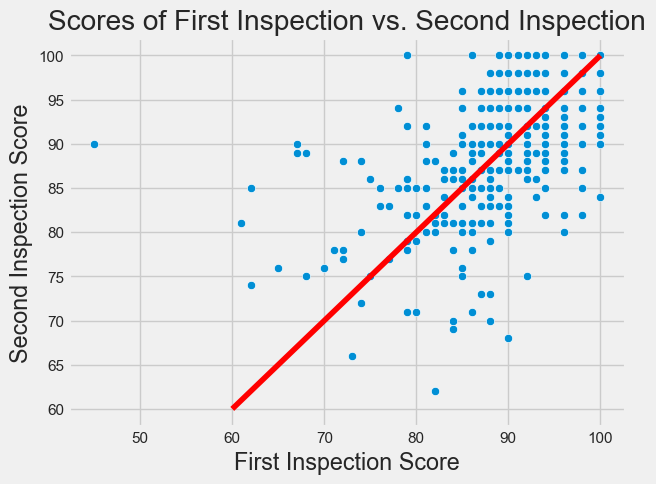

In [37]:
list(zip(*scores_pairs_by_business["score_pair"]))[1]
sns.scatterplot(x = list(zip(*scores_pairs_by_business["score_pair"]))[0], y = list(zip(*scores_pairs_by_business["score_pair"]))[1])
plt.plot([60, 100], [60, 100], color = "red")
plt.title("Scores of First Inspection vs. Second Inspection")
plt.xlabel("First Inspection Score")
plt.ylabel("Second Inspection Score")

### 5.5: Comparing Differences Between Two Inspection Scores

Another way I compare the scores from the two inspections is by examining the difference in the two scores: $SecondScore-FirstScore$. I make a histogram of these differences in the scores to visualize the distribution.

Text(0, 0.5, 'Count')

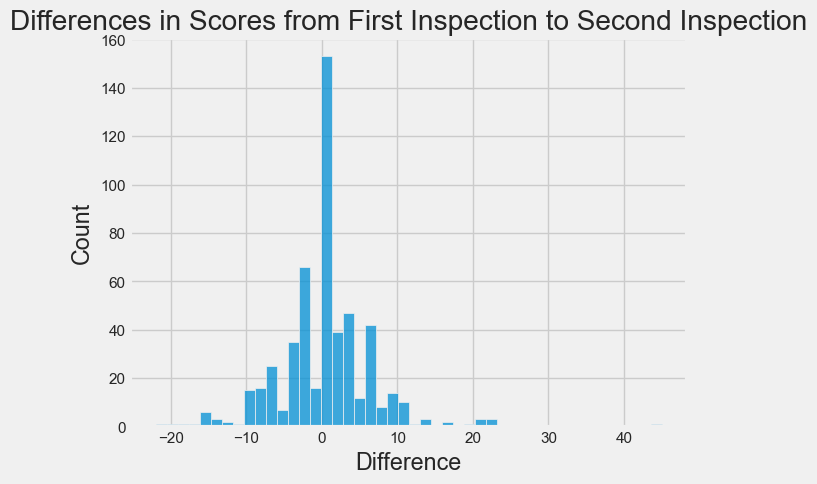

In [38]:
differences_in_score = np.array(list(zip(*scores_pairs_by_business["score_pair"]))[1]) - np.array(list(zip(*scores_pairs_by_business["score_pair"]))[0])
sns.histplot(data = differences_in_score)
plt.title("Differences in Scores from First Inspection to Second Inspection")
plt.xlabel("Difference")
plt.ylabel("Count")

### 5.6: Interpreting the Scatterplot of Score Pairs

If restaurants' scores tended to improve from the first inspection to the second inspection, I would expect to see the majority of the points on the scatter plot *above* the line of slope = 1, because the line of slope = 1 represents restaurants whose scores in the first inspection and second inspection are exactly the same. If a restaurant's score improved, it would fall above that score. In the scatterplot I created, it seems like the number of restaurants whose score improved between inspections is roughly equal to the number of restaurants whose score *worsened*. It does *not* seem like restaurants' scores tended to improve from the first inspection to the second inspection. Whether or not a restaurant's score improved seems to be approximately 50/50, just by eye-balling the scatterplot.

### 5.7: Interpreting the Histogram of Differences Between Scores in Pairs

If restaurants' scores tended to improve from the first inspection to the second inspection, the majority of the datapoints in the histogram would be on the positive side of the x-axis. This hypothetical distribution would be left-skewed (long tail on the left side of the histogram). In such distributions, the value of the mean/average would be less than the value of the median. However, none of this is reflected in the *actual* histogram I plotted. The actual data shows an approximately normal distribution with a center at 0, meaning no change between first inspection score and second inspection score.

## Wrapping Up

This project is now complete. In this project, I worked through a number of **data cleaning** and **exploratory data analysis** tasks using data pertaining to San Francisco restaurants and building inspections. After exploring each dataset individually, I cleaned any and all errors I caught to make the data easier to work with.